# Control Run Analysis

Analyze data from control run experiments

# Inputs

In [1]:
import pandas as pd
import seaborn as sns
import os
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
# Read in centered data
df = pd.read_hdf('/mnt/data/expression/tcga_gtex_tpm_norm_filt_centered.hd5')
# Subset
gtex = df[df.label == 'gtex'].sort_values('tissue')
normal = df[df.label == 'tcga-normal'].sort_values('tissue')
tumor = df[df.label == 'tcga-tumor'].sort_values('tissue')
# Read in drug genes
drug_genes = [x.split('\t')[0] for x in open('../data/druggable-genes.tsv', 'r').readlines()]
drug_genes = [x for x in drug_genes if x in df.columns]

In [3]:
def collect_pvals(run_dir):
    pvals = {}
    for root, dirs, files in os.walk(run_dir):
        for file in files:
            if file.endswith('tsv'):
                base = os.path.basename(root)
                pvals[base] = pd.read_csv(os.path.join(root, file), sep='\t', index_col=0).sort_values('gene')
    return pvals

In [61]:
def plot_pearson(pvals):
    pearsonrs = {}
    for key in pvals:
        if key == 'AllData':
            continue
        # Pull out matchedNormal and comparison, sorting by gene
        mn = pvals['MatchedNormal'].sort_values('gene')
        c = pvals[key].sort_values('gene')
        
        # Remove mismatched genes
        genes_to_remove = sorted(set(mn.gene).difference(set(c.gene)))
        if genes_to_remove:
            print(genes_to_remove)
            mn = mn[~mn.gene.isin(genes_to_remove)]
            c = c[~c.gene.isin(genes_to_remove)]
        
        # Calculate PearsonR
        pearsonrs[key] = pearsonr(mn.pval, c.pval)[0]

    barplot = pd.Series(pearsonrs).sort_values()
    sns.barplot(barplot.index, barplot.values)
    plt.xticks(rotation=45)
    return pearsonrs

# Initial Runs

In [50]:
p = collect_pvals('Control-Runs/TCGA-G7-7502-01-Kidney/')

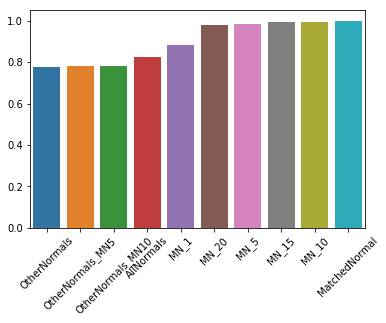

In [54]:
plot_pearson(p)

In [55]:
p = collect_pvals('Control-Runs/TCGA-LQ-A4E4-01-Breast/')

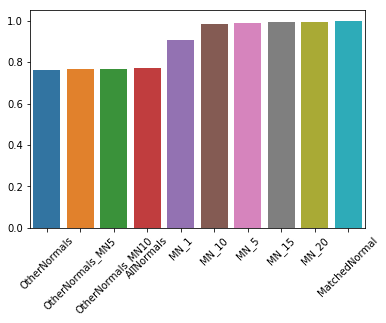

In [56]:
plot_pearson(p)

# 50 Gene Runs

In [59]:
p1 = collect_pvals('Control-Runs-50Genes/TCGA-CJ-4916-01-Kidney/')

{'MatchedNormal': 1.0,
 'AllNormals': 0.8615028697643063,
 'OtherNormals_MN5': 0.8114359257081162,
 'OtherNormals_MN10': 0.8135389957071495,
 'OtherNormals': 0.808892714948315}

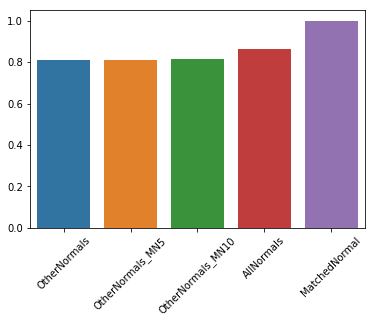

In [62]:
plot_pearson(p1)

# 500 Genes + Drug Genes

In [57]:
p2 = collect_pvals('Control-Runs-500Genes_DrugGenes/TCGA-LQ-A4E4-01-Breast/')

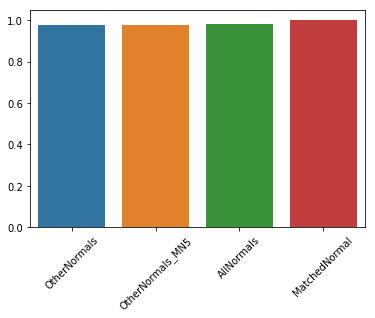

In [58]:
plot_pearson(p2)